In [9]:
from qutip import*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
vac = basis(5, 0)

d = displace(5, 1j)

s = squeeze(5, complex(0.25, 0.25))

print(d * vac)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.60655682+0.j        ]
 [ 0.        +0.60628133j]
 [-0.4303874 +0.j        ]
 [ 0.        -0.24104351j]
 [ 0.14552147+0.j        ]]


In [7]:
squeezed = d*s*vac

In [10]:
a = destroy(5)
N = a.dag()*a

In [11]:
expect(N,squeezed)

1.0635891197519527

In [6]:
import math

In [13]:
alpha = 2
expect_n = alpha**2

In [33]:
ns = []
for k in range(30):
    ns.append((np.exp(-expect_n))*((expect_n)**k)/math.factorial(k))

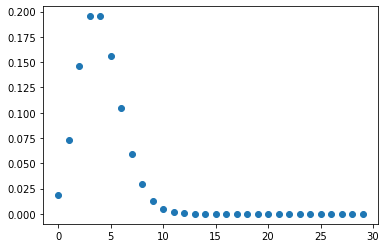

In [35]:
plt.scatter(np.arange(0,30),ns)

In [9]:
max  = np.max(ns)

In [10]:
ns = ns/max

In [11]:
ns = []
for i in range(100):
    ns.append(np.random.normal(2,0.5))

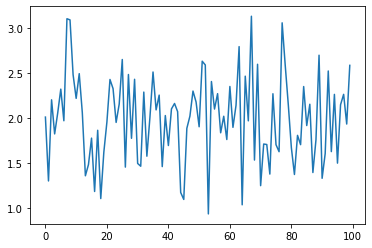

In [12]:
plt.plot(ns)

In [133]:
alpha = 2
variance = 1/2

In [206]:
ns = ns/max

In [286]:
ns_amplitude = list(ns)
ns_phase = list(ns)

In [235]:
ns_amplitude;

In [287]:
np.random.shuffle(ns_amplitude)
np.random.shuffle(ns_phase)

In [238]:
ns_amplitude;

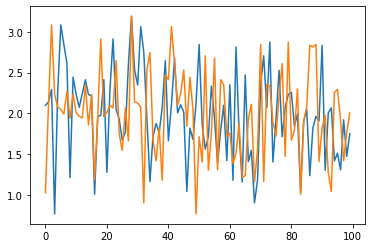

In [288]:
plt.plot(ns_amplitude)
plt.plot(ns_phase)

In [319]:
Es = []
alphas = []
thetas = np.linspace(0,4*np.pi,100)
for j in range(100):
#     if(ns_amplitude[j]>0.4):
        E = []
        alphas.append(np.sqrt(ns_amplitude[j]**2 + ns_phase[j]**2))
        for theta in thetas:
            E.append(ns_amplitude[j]*np.exp(1j*(theta+ns_phase[j])))
        Es.append(E)


In [320]:
sum = 0
for i in alphas:
    sum +=i
average = sum/len(alphas)

In [321]:
average

2.8522291168463028

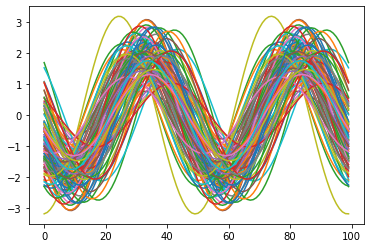

In [290]:
for i in range(len(Es)):
    plt.plot(Es[i]);

In [136]:
alpha = 2
variance = 1/2

In [137]:
import random
# rand = random.uniform(alpha-variance,alpha+variance)


In [179]:
alpha = 2
variance = 3/2

In [446]:
Es = []
alphas = []
for i in range(100):
    rand1 = np.random.normal(0,variance)*(1/((1/2)*(np.pi)))
#     alphas.append(alpha_)
    rand2 = np.random.normal(0,variance)*(1/((1/2)*(np.pi)))
#     alphas.append(np.sqrt(rand1**2+rand2**2))
#     rand2 = np.sqrt(argument)
    E = []
    thetas = np.linspace(0,4*np.pi,100)
    for theta in thetas:
        E.append((rand1)*(np.exp(1j*(theta+rand2))))
    Es.append(E)

In [447]:
average

2.8522291168463028

In [448]:
Es =  np.asarray(Es)

In [449]:
import seaborn as sns

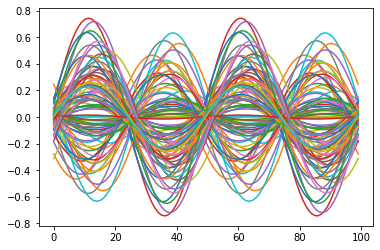

In [451]:
for i in range(len(Es)):
    plt.plot(Es[i].imag);

In [46]:
Es = np.asarray(Es)

In [47]:
np.save('coherent_2_1.npy', Es)

In [67]:
Es = []
for i in range(100):
    E = []
    thetas = np.linspace(0,2*np.pi,100)
    for j in range(100):
        rand1 = random.uniform(alpha-variance,alpha+variance)
        argument = complex(alpha**2) - rand1**2
        rand2 = np.sqrt(argument)
        E.append((rand1 + 1j*rand2)*np.exp(1j*theta))
    Es.append(E)

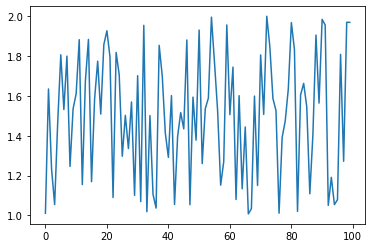

In [69]:
plt.plot(Es[1]);

In [72]:
Es = []
for i in range(100):
    rand1 = random.uniform(alpha-variance,alpha+variance)
    argument = complex(alpha**2) - rand1**2
    rand2 = np.sqrt(argument)
    E = []
    thetas = np.linspace(-3,3,100)
    for theta in thetas:
        E.append((rand1 + 1j*rand2)*np.exp(-thetas**2))
    Es.append(E)

In [76]:
Es =  np.asarray(Es)

In [77]:
Es.shape

(100, 100, 100)

In [53]:
alpha = 5
times = np.linspace(0,2*np.pi,100)
w = 1
beta_1 = alpha*np.cos(w*times)
beta_2 = alpha*np.sin(w*times)


In [54]:
import scipy.stats as st

class quadrature_1(st.rv_continuous):
    def _pdf(self,alpha1,beta_1, beta_2):
        answer = np.exp(2*1j*beta_2*alpha1 + 1j*beta_1*beta_2 - (alpha1-beta_1)**2)/((np.pi)**(1/4))
        return answer**2
quadrature_X1 = quadrature_1(name='quadrature_1')

In [55]:
class quadrature_2(st.rv_continuous):
    def _pdf(self,alpha2,beta_1, beta_2):
        answer =  np.exp(-2*1j*beta_2*alpha2 - 1j*beta_1*beta_2 - (alpha2+beta_2)**2)/((np.pi)**(1/4))  # Normalized over its range, in this case [0,1]
        return answer**2
quadrature_2 = quadrature_2(name='quadrature_2')

In [56]:
sample

NameError: name 'sample' is not defined

In [ ]:
len(beta_1)

In [ ]:
beta_2[10]

In [ ]:
import random

## START

In [2]:
def pdf1(alpha1,beta_1, beta_2):
        answer = np.exp(2*1j*beta_2*alpha1 - 1j*beta_1*beta_2 - (alpha1-beta_1)**2)/((np.pi/2)**(1/4))
        return np.abs(answer)*np.abs(answer)

In [3]:
def pdf2(alpha2,beta_1, beta_2):
        answer =  np.exp(-2*1j*beta_1*alpha2 + 1j*beta_1*beta_2 - (alpha2-beta_2)**2)/((np.pi/2)**(1/4))  
        return np.abs(answer)*np.abs(answer)

In [4]:
alpha = 2
w = 10**2
times = np.linspace(0,2*np.pi/w,128)
# beta = alpha*np.exp(-1j*w*times)
# beta_1 = beta.real
# beta_2 = beta.imag


In [10]:
def coherent_states(alphas,times,hilbert_space = 100, num_trajectories=100):
    input_ = []
    output = []
    for alpha in alphas:
        w = 10**2
#         times = np.linspace(0,2*np.pi/w,128)
        beta = alpha*np.exp(-1j*w*times)
        beta_1 = beta.real
        beta_2 = beta.imag
        annihilation = []
        # Es_real = []
        # Es_imag = []
        # # distributions1 = []
        # distributions2 = []
#         num_trajectories = 100
    # Es_real = []
    # Es_imag = []
    # # distributions1 = []
        annihilation = np.zeros((num_trajectories, len(times)),dtype = complex)
    # annihilation.astype(np.complex128)
        for i in range(len(beta_1)):
            x1 = np.arange(beta_1[i]-(0.5)*4,beta_1[i]+(0.5)*4,0.01)
            x2 = np.arange(beta_2[i]-(0.5)*4,beta_2[i]+(0.5)*4,0.01)
    #         x1_complex = np.arange(np.absolute(beta_1[i].imag)-(0.5)*4,np.absolute(beta_1[i].imag)+(0.5)*4,0.01)
    #         x2_complex = np.arange(np.absolute(beta_2[i].imag)-(0.5)*4,np.absolute(beta_2[i].imag)+(0.5)*4,0.01)
    #         x1 = x1_real + 1j*x1_complex
    #         x2 = x2_real + 1j*x2_complex
    #         distribution1 = []
    #         distribution2 = []
    #         for j in range(len(x1)):
            distribution1 = pdf1(x1,beta_1[i],beta_2[i])
            distribution2 = pdf2(x2,beta_1[i],beta_2[i])
    #         distributions1.append(distribution1)
    #         distributions2.append(distribution2)
    #         distribution1 = distribution1/np.max(distribution1)
    #         distribution2 = distribution2/np.max(distribution2)
#             for k in range(num_trajectories):
            random_number1 = random.choices(x1, distribution1, k =num_trajectories)
            random_number2 = random.choices(x2,distribution2,  k =num_trajectories)
            annihilation[:,i] = random_number1 + 1j*np.asarray(random_number2)
    #          E_i.append(random_number2[0])
        input_.append(annihilation)
    #     expect_n = alpha*np.conjugate(alpha)
    #     ns_ = []
    #     for k in range(101):
    #         if(k>21):
    #             factorial_ = np.sqrt(2*pi*k)*((k/e)**k)
    #         else:
    #             factorial_ = math.factorial(k)
    # #     print(factorial)
    #         ns_.append(((np.exp(-expect_n/2))*((alpha)**k)/(np.sqrt(factorial_))))
    #     output.append(ns_)
        output.append(np.asarray(coherent(hilbert_space,alpha, method='analytic')))
#         if(len(output)%100 == 0):
#             print(len(output))
            
    return np.asarray(input_),np.asarray(output)

In [58]:
input_, _ = coherent_states(np.array([4]),times)

In [59]:
input_.shape

(1, 100, 128)

C:\Users\ashuk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


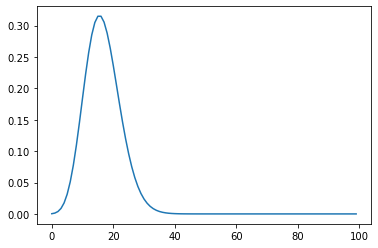

In [47]:
plt.plot(output[0][:])

In [268]:
len(times)

128

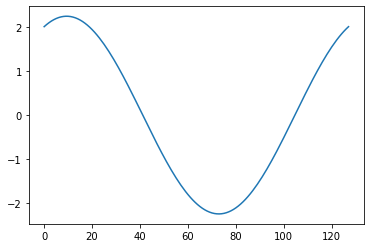

In [241]:
plt.plot(beta_1);

In [242]:
import random

In [243]:
annihilation = []
# Es_real = []
# Es_imag = []
# # distributions1 = []
# distributions2 = []
for nums in range(100):
    E_r = []
    E_i = []
    for i in range(len(beta_1)):
        x1 = np.arange(beta_1[i]-(0.5)*4,beta_1[i]+(0.5)*4,0.01)
        x2 = np.arange(beta_2[i]-(0.5)*4,beta_2[i]+(0.5)*4,0.01)
#         x1_complex = np.arange(np.absolute(beta_1[i].imag)-(0.5)*4,np.absolute(beta_1[i].imag)+(0.5)*4,0.01)
#         x2_complex = np.arange(np.absolute(beta_2[i].imag)-(0.5)*4,np.absolute(beta_2[i].imag)+(0.5)*4,0.01)
#         x1 = x1_real + 1j*x1_complex
#         x2 = x2_real + 1j*x2_complex
#         distribution1 = []
#         distribution2 = []
        distribution1 = pdf1(x1,beta_1,beta_2)
        distribution2 = pdf2(x2[j],beta_1[i],beta_2[i])
#         distributions1.append(distribution1)
#         distributions2.append(distribution2)
#         distribution1 = distribution1/np.max(distribution1)
#         distribution2 = distribution2/np.max(distribution2)
        random_number1 = random.choices(x1, distribution1)
        random_number2 = random.choices(x2,distribution2)
        E_r.append(random_number1[0] +1j*random_number2[0])
#         E_i.append(random_number2[0])
    annihilation.append(E_r)
#     Es_imag.append(E_i)
        
        
        

In [300]:
num_trajectories = 100
# Es_real = []
# Es_imag = []
# # distributions1 = []
annihilation = np.zeros((num_trajectories, len(times)),dtype = complex)
# annihilation.astype(np.complex128)
for i in range(len(beta_1)):
    x1 = np.arange(beta_1[i]-(0.5)*4,beta_1[i]+(0.5)*4,0.01)
    x2 = np.arange(beta_2[i]-(0.5)*4,beta_2[i]+(0.5)*4,0.01)
#         x1_complex = np.arange(np.absolute(beta_1[i].imag)-(0.5)*4,np.absolute(beta_1[i].imag)+(0.5)*4,0.01)
#         x2_complex = np.arange(np.absolute(beta_2[i].imag)-(0.5)*4,np.absolute(beta_2[i].imag)+(0.5)*4,0.01)
#         x1 = x1_real + 1j*x1_complex
#         x2 = x2_real + 1j*x2_complex
    distribution1 = []
    distribution2 = []
    for j in range(len(x1)):
        distribution1.append(pdf1(x1[j],beta_1[i],beta_2[i]))
    for j in range(len(x2)):
        distribution2.append(pdf2(x2[j],beta_1[i],beta_2[i]))
#         distributions1.append(distribution1)
#         distributions2.append(distribution2)
#         distribution1 = distribution1/np.max(distribution1)
#         distribution2 = distribution2/np.max(distribution2)
    for k in range(num_trajectories):
        random_number1 = random.choices(x1, distribution1)
        random_number2 = random.choices(x2,distribution2)
        annihilation[k,i] = random_number1[0] + 1j*random_number2[0]
#          E_i.append(random_number2[0])
# annihilation.append(E_r)
#     Es_imag.append(E_i)
        

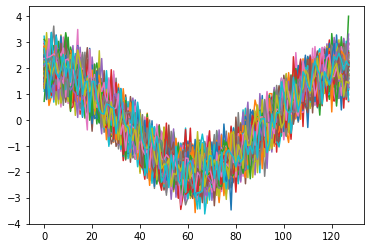

In [301]:
for i in range(100):
    plt.plot(annihilation[i].real)

In [302]:
annihilation_LO = np.asarray(annihilation)

In [303]:
creation_LO = np.conjugate(annihilation)

In [189]:
annihilations += annihilation_LO
creations += creation_LO

In [50]:
annihilation_LO.shape

(500, 128)

In [ ]:
distributions1.shape

In [388]:
plt.plot(distributions1[0]);

NameError: name 'distributions1' is not defined

In [ ]:
for i in range(len(annihilation_LO)):
    plt.plot(annihilation_LO[i].real,color='blue');

In [ ]:
for i in range(len(annihilation)):
    plt.scatter(annihilation[i].real,annihilation[i].imag,color='red');

In [ ]:
plt.plot(annihilation[1].real);

In [806]:
for i in range(len(annihilation)):
    plt.plot(annihilation[i].real,color='red');

AttributeError: 'list' object has no attribute 'real'

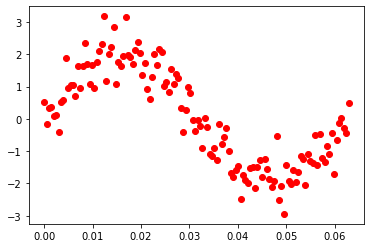

In [46]:
for i in range(1):
    plt.scatter(times,Es_imag[i],color='red');

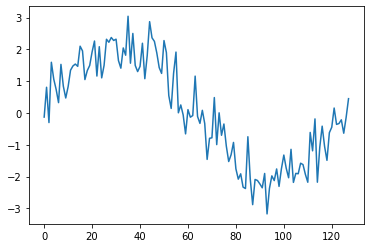

In [44]:
plt.plot(Es_imag[1]);

In [15]:
np.save('E_real.npy',Es_real)
np.save('E_imag.npy',Es_imag)

In [300]:
E = []
for i in range(len(Es_real[0])):
    E.append(np.abs(Es_real[1][i]+1j*Es_imag[1][i]))

In [311]:
E = np.abs(annihilation[0])

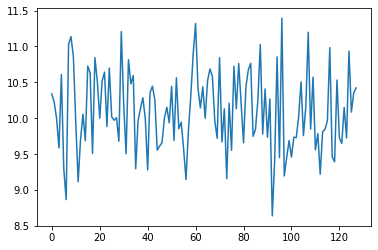

In [308]:
plt.plot(np.abs(annihilation[0]));

In [296]:
import statistics

In [312]:
statistics.stdev(E)

0.5509234023786392

In [313]:
statistics.mean(E)

10.097528851473612

In [47]:
E = []
for i in range(len(Es_real[0])):
    E.append(Es_real[0][i]+Es_imag[0][i])

In [48]:
E= np.asarray(E)

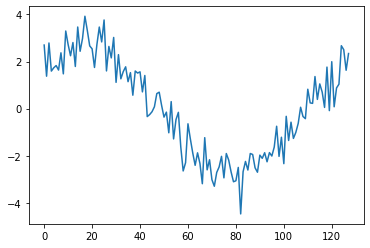

In [50]:
plt.plot(E);

In [640]:
w = np.linspace(-10,10, 200)

In [22]:
gaussian_amp = 2

In [23]:
Es_real = []
Es_imag = []
# distributions1 = []
# distributions2 = []
for i,w_i in enumerate(w):
    for m in range(1):
        E_r = []
        E_i = []
        amp = np.sqrt(np.pi)*np.exp(-np.pi*np.pi*w[i]**2)
        times = np.linspace(-20,20,200)
        beta_1 = gaussian_amp*np.cos(w[i]*times)
        beta_2 = gaussian_amp*np.sin(w[i]*times)
        for j in range(len(beta_1)):
            x1 = np.linspace(beta_1[j]-(0.5)*5,beta_2[j]+(0.5)*5,100)
            x2 = np.linspace(beta_1[j]-(0.5)*5,beta_2[j]+(0.5)*5,100)
            distribution1 = []
            distribution2 = []
            for k in range(len(x1)):
                distribution1.append(pdf1(x1[k],beta_1[j],beta_2[j]))
                distribution2.append(pdf2(x2[k],beta_1[j],beta_2[j]))
                #         distributions1.append(distribution1)
                #         distributions2.append(distribution2)
            distribution1 = distribution1/np.max(distribution1)
            distribution2 = distribution2/np.max(distribution2)
            random_number1 = random.choices(x1, distribution1)
            random_number2 = random.choices(x2, distribution2)
            E_r.append(random_number1[0]*amp)
            E_i.append(random_number2[0]*amp)
        Es_real.append(E_r)
        Es_imag.append(E_i)
        
        
        

TypeError: 'int' object is not iterable

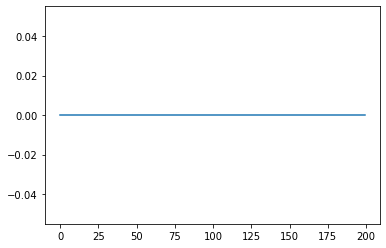

In [660]:
plt.plot(Es_real[1])

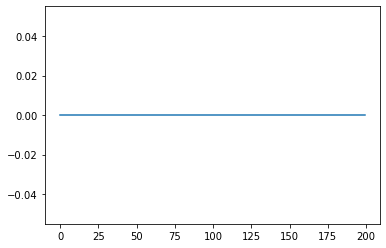

In [661]:
plt.plot(Es_real[1]);

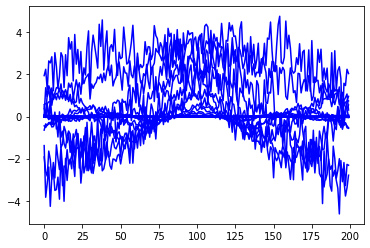

In [668]:
for i in range(len(Es_real)):
    plt.plot(Es_real[i],color='blue');

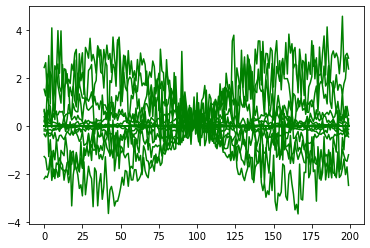

In [669]:
for i in range(len(Es_real)):
    plt.plot(Es_imag[i],color='green');

In [670]:
Es_real = np.asarray(Es_real)
Es_imag = np.asarray(Es_imag)

In [671]:
E = 0

In [672]:
for i in range(len(Es_real)):
    E+=(Es_real[i])

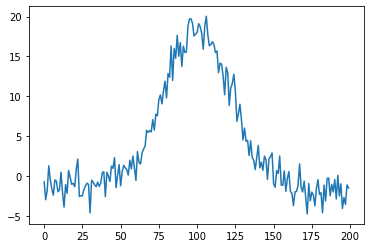

In [673]:
plt.plot(E)

In [25]:
alpha = 2
expect_n = alpha**2

In [26]:
ns = []
for k in range(100):
    ns.append((np.exp(-expect_n))*((expect_n)**k)/math.factorial(k))

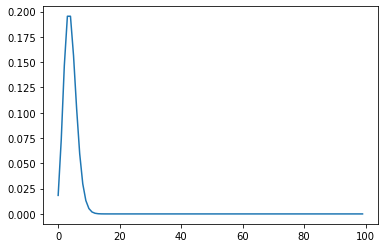

In [27]:
plt.plot(ns)

In [39]:
Es_real = np.asarray(Es_real)

In [40]:
Es_imag = np.asarray(Es_imag)

In [55]:
E_plus = Es_real + 1j*Es_imag

In [56]:
E_minus = np.conjugate(E_plus)

In [138]:
def second_order_corr(E_plus_t, E_minus_t,E_plus_t2,E_minus_t2):
    corr = E_minus_t*E_minus_t2*E_plus_t2*E_plus_t
    mean1 = np.mean(corr)
    mean2 = (np.mean(E_plus_t*E_minus_t))*(np.mean(E_plus_t2*E_minus_t2))
    return mean1/mean2
    
        

In [144]:
second_order_corr(E_plus[1],E_minus[1],E_plus[2],E_minus[2])

(1.2493873646781823-2.129588515617133e-17j)

## SQUEEZED STATE

In [60]:
import random as random

In [82]:
lambda_ = 2
mu = (1+lambda_)/(2*np.sqrt(lambda_))
nu = (1-lambda_)/(2*np.sqrt(lambda_))

In [83]:
beta = 2


In [84]:
w = 10**2
times = np.linspace(0,2*np.pi/w,128)
mean_real = (mu*beta - nu*beta)*np.cos(w*times)
mean_imag = -(mu*beta - nu*beta)*np.sin(w*times)

In [85]:
var_real = (np.abs((mu-nu*np.exp(-2j*w*times)))**2)/4
var_imag = (np.abs((mu+nu*np.exp(-2j*w*times)))**2)/4

In [86]:
def pdf_1(x, mean_real, mean_imag, var_real, var_imag):
    answer = np.exp(2j*mean_imag*x - 1j*mean_real*mean_imag - ((x-mean_real)**2)/(4*var_real))/(2*np.pi*var_real)**(1/4)
    return (np.abs(answer))*np.abs(answer)

In [87]:
def pdf_2(x, mean_real, mean_imag, var_real, var_imag):
    answer = np.exp(-2j*mean_real*x + 1j*mean_real*mean_imag - ((x-mean_imag)**2)/(4*var_imag))/(2*np.pi*var_imag)**(1/4)
    return (np.abs(answer))*np.abs(answer)

In [88]:
annihilation = []
# Es_imag = []
# distributions1 = []
# distributions2 = []
for nums in range(10):
    E_r = []
    E_i = []
    for i in range(len(mean_real)):
        x1 = np.linspace(mean_real[i]-(var_real[i])*4,mean_real[i]+(var_real[i])*4,100)
        x2 = np.linspace(mean_imag[i]-(var_imag[i])*4,mean_imag[i]+(var_imag[i])*4,100)
        distribution1 = []
        distribution2 = []
        for j in range(len(x1)):
            distribution1.append(pdf_1(x1[j],mean_real[i],mean_imag[i],var_real[i],var_imag[i]))
        for a1 in range(len(x2)):
            distribution2.append(pdf_2(x2[a1],mean_real[i],mean_imag[i],var_real[i],var_imag[i]))
#         distributions1.append(distribution1)
#         distributions2.append(distribution2)
#         distribution1 = distribution1/np.max(distribution1)
#         distribution2 = distribution2/np.max(distribution2)
        random_number1 = random.choices(x1, distribution1)
        random_number2 = random.choices(x2,distribution2)
        E_r.append(random_number1[0] + 1j*random_number2[0])
#         E_i.append(random_number2[0])
    annihilation.append(E_r)
#     Es_imag.append(E_i)
        
        
        

In [89]:
annihilation_squeezed = np.asarray(annihilation)
creation_squeezed = np.conjugate(annihilation)

In [90]:
annihilation_squeezed.shape

(10, 128)

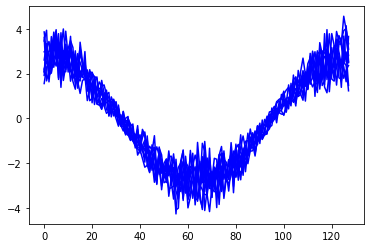

In [91]:
for i in range(len(annihilation_squeezed)):
    plt.plot(annihilation_squeezed[i].real,color='blue');

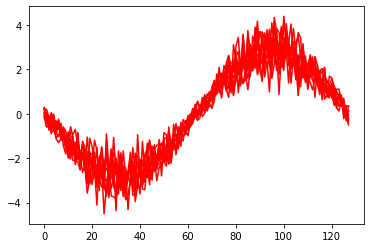

In [92]:
for i in range(len(annihilation_squeezed)):
    plt.plot(annihilation_squeezed[i].imag,color='red');

In [ ]:
plt.plot(Es_imag[1]);

In [ ]:
for i in range(len(annihilation)):
    plt.scatter(annihilation[i].real,annihilation[i].imag,color='red');

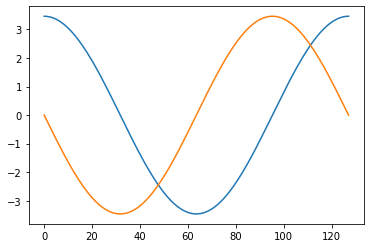

In [16]:
plt.plot(mean_real);
plt.plot(mean_imag);

In [621]:
def second_order_corr(E_plus_t, E_minus_t,E_plus_t2,E_minus_t2):
    corr = E_minus_t*E_minus_t2*E_plus_t2*E_plus_t
    mean1 = np.mean(corr)
    mean2 = (np.mean(E_plus_t*E_minus_t))*(np.mean(E_plus_t2*E_minus_t2))
    return mean1/mean2
    
        

In [623]:
second_order_corr(E_plus[1],E_minus[1],E_plus[1],E_minus[1])

(1.1702468315481935+8.033540301443948e-18j)

In [682]:
E = np.asarray(Es_real) + np.asarray(Es_imag)

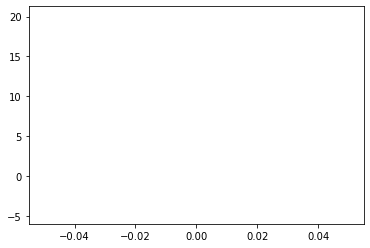

In [677]:
for i in range(len(E)):
    plt.plot(E[i]);

In [676]:
def fidelity(array1,array2):
    return np.sum(np.sqrt(array1*array2))**2

In [684]:
E.shape

(200, 200)

In [18]:
np.save("E_imag.npy", Es_imag)
np.save("E_real.npy", Es_real)

In [50]:
Es_real = []
Es_imag = []
E = []
# distributions1 = []
# distributions2 = []
for nums in range(100):
    E_r = []
    E_i = []
    for i in range(len(mean_real)):
        x1 = np.linspace(mean_real[i]-(var_real[i])*4,mean_real[i]+(var_real[i])*4,100)
        x2 = np.linspace(mean_imag[i]-(var_imag[i])*4,mean_imag[i]+(var_imag[i])*4,100)
        distribution1 = []
        distribution2 = []
        for j in range(len(x1)):
            distribution1.append(pdf_1(x1[j],mean_real[i],mean_imag[i],var_real[i],var_imag[i]))
        for a1 in range(len(x2)):
            distribution2.append(pdf_2(x2[a1],mean_real[i],mean_imag[i],var_real[i],var_imag[i]))
#         distributions1.append(distribution1)
#         distributions2.append(distribution2)
#         distribution1 = distribution1/np.max(distribution1)
#         distribution2 = distribution2/np.max(distribution2)
        random_number1 = random.choices(x1, distribution1)
        random_number2 = random.choices(x2,distribution2)
        E_r.append(random_number1[0]*np.cos(w*times[i]))
        E_i.append(random_number2[0]*np.sin(w*times[i]))
    Es_real.append(E_r)
    Es_imag.append(E_i)
    E.append(np.asarray(E_r)+np.asarray(E_i))
        
        

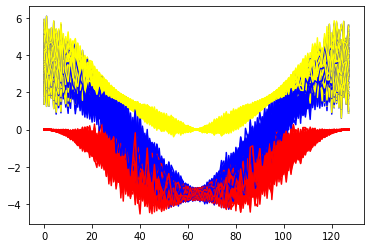

In [54]:
for i in range(len(E)):
    plt.plot(E[i],color='blue');
#     plt.plot(Es_real[i], color = 'yellow');
#     plt.plot(Es_imag[i], color = 'red')

In [27]:
E[1]

array([ 3.61561677,  4.88086103,  4.31772666,  2.44517857,  3.42451171,
        4.13019793,  1.32053341,  3.0622669 ,  3.05771239,  3.50152926,
        5.1449078 ,  3.49045136,  2.44720735,  3.1945795 ,  2.59440237,
        2.19156235,  1.89329361,  2.7601957 ,  2.05336336,  2.12914773,
        1.19411932,  2.16363045,  1.3453531 ,  1.46912462,  0.93812204,
        1.12078613,  0.62994913,  0.91580386,  0.89140671,  0.70289812,
        0.47085515,  0.06967925,  0.09296357, -0.45002375, -0.20845369,
       -0.39026421, -0.54886431, -0.54159737, -0.97799274, -1.1467041 ,
       -1.60052147, -2.14922434, -1.74510391, -2.69234854, -1.83489198,
       -2.26721589, -2.76054073, -1.45596845, -2.13949703, -2.95297237,
       -1.94699176, -2.52088363, -3.14032674, -3.54612553, -2.50696319,
       -3.38513814, -1.15449244, -4.38723853, -2.83149489, -4.52729036,
       -3.91908706, -3.29808995, -2.94551522, -4.70654618, -3.96838659,
       -4.43946128, -5.96769847, -3.71955903, -4.36708451, -4.36

## Homodyne detection

In [893]:
a = annihilation_squeezed
a_dag = np.conjugate(a)
# a = annihilation 
# a_dag = np.conjugate(a)
b = annihilation_LO
b_dag = np.conjugate(b)

In [101]:
T = 0.50

In [896]:
Na_mean = np.mean(a_dag*a)

In [897]:
Nb_mean = np.mean(b_dag*b)

In [898]:
shot_noise = np.ones(360)*Na_mean

In [899]:
Na_mean

(12.746415641799002+0j)

In [900]:
Nb_mean*(1-T) - Na_mean*T

(988.5458039254174+0j)

In [99]:
phis = np.arange(0,360)

In [102]:
a = annihilation_coherent
a_dag = np.conjugate(a)
b = annihilation_LO
b_dag = np.conjugate(b)
noise_voltage  = []
for phi in phis:
    b_ = b*np.exp(1j*phi)
    b_dag_ = np.conjugate(b_)
    c = (np.sqrt(T)*a  + 1j*np.sqrt(1-T)*b_)
    d = (1j*np.sqrt(1-T)*a + np.sqrt(T)*b_)
    c = np.asarray(c)
    d = np.asarray(d)
    c_dag = np.conjugate(c)
    d_dag = np.conjugate(d)
    Nc = c_dag*c - d_dag*d
    Nc_mean = np.mean(Nc)
    Nc_variance = Nc.var()
#     Nc_variance  = 0
#     for i in range(len(Nc)):
#         Nc_variance += (np.mean(Nc[i]) - Nc_mean)**2
#     Nc_variance = Nc_variance/len(Nc)
    squeezed_bool = (Nc_variance/(4*np.mean(b_dag_*b_)))
    noise_voltage.append(squeezed_bool)
noise_voltage = np.asarray(noise_voltage)

In [104]:
shot_noise = 0.25*np.ones(360)

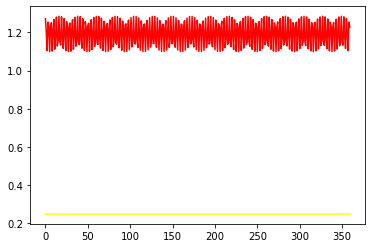

In [105]:
plt.plot(noise_voltage.real, color = 'red')
plt.plot(np.ones(360)*shot_noise.real.mean(), color = 'yellow')

In [1012]:
c_dag = np.conjugate(c)

In [719]:
d_dag = np.conjugate(d)

In [720]:
c.shape

(100, 128)

In [721]:
Nc = c_dag*c

In [722]:
Nc_mean = np.mean(Nc)

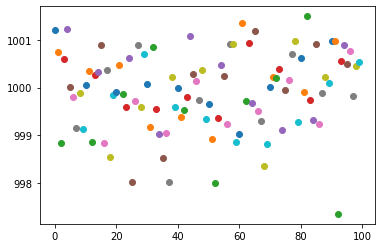

In [723]:
for i in range(100):
    mean_ = np.mean(Nc[i])
    plt.scatter(i,np.real(mean_));

In [724]:
Nc_variance  = 0
for i in range(len(Nc)):
    Nc_variance  = (np.mean(Nc[i]) - Nc_mean)**2
Nc_variance = Nc_variance/len(Nc)

In [725]:
Nc_variance

(0.003716689923119585+0j)

In [726]:
squeezed_bool = (Nc_variance/((1-T)*(np.mean(b_dag*b))) - (1-T))/4*T

In [727]:
squeezed_bool 

(-0.022499163677720098+0j)

In [39]:
a = annihilation_coherent

In [68]:
sum = 0
for i in range(len(a)):
    sum +=a[i][a[21].argmax()].real

In [69]:
mean  = sum/100

In [70]:
mean

1.220514784783199

In [1013]:
variance = 0
for i in range(len(a)):
    variance +=(a[i][0].real - mean)**2

In [1014]:
variance = variance/100

In [1015]:
mu_minus_nu = np.sqrt(variance*4)

In [1016]:
mu_minus_nu

3.226758087198282

In [1017]:
beta = mean/mu_minus_nu

In [1018]:
beta

1.0656662125758882

In [53]:
from  qutip import*

In [136]:
density_matrix1 = coherent_dm(N=100,alpha = 1.22)

In [137]:
density_matrix2 = coherent_dm(N=100, alpha = 2)

In [138]:
fidelity(density_matrix1, density_matrix2)

0.7377181245360838

# Sinusoidal Data

In [1020]:
def pdf1(alpha1,beta_1, beta_2):
        answer = np.exp(2*1j*beta_2*alpha1 - 1j*beta_1*beta_2 - (alpha1-beta_1)**2)/((np.pi/2)**(1/4))
        return np.abs(answer)*np.abs(answer)

In [1135]:
x1 = np.linspace(2-(0.5)*4,2+(0.5)*4,10000)
x2 = np.linspace(2-(0.5)*4,2+(0.5)*4,10000)
distribution1 = []
distribution2 = []
for k in range(len(x1)):
    distribution1.append(pdf1(x1[k],2,2))
    distribution2.append(pdf2(x2[k],2,2))
                #         distributions1.append(distribution1)
                #         distributions2.append(distribution2)
# distribution1 = distribution1/np.max(distribution1)
# distribution2 = distribution2/np.max(distribution2)

In [1136]:
alpha = 2
times = np.linspace(0,2*np.pi/w,100)
E = []
for i in range(1000):
    value = random.choices(x1,distribution1)
    E_r = value*np.exp(-1j*w*times)
    E.append(E_r)
E = np.asarray(E)

In [1137]:
sum = []
for i in range(100):
    sum.append(E[i][0])

In [1138]:
sum = np.asarray(sum)

In [1140]:
sum.var()

0.28172314174711804

In [84]:
annihilation_coherent = np.load('E_out_smooth_coherent_100.npy')

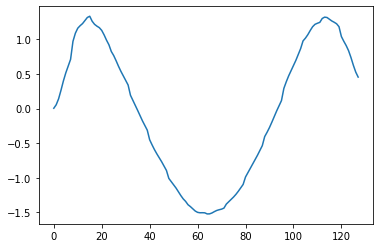

In [184]:
plt.plot(annihilation_coherent[1][:].real);

In [61]:
w = 10**2
times = np.linspace(0,3*np.pi/w,128)

In [67]:
difference_array = np.absolute(times-np.pi/(2*w))
difference_array.argmin()

21

In [66]:
annihilation_coherent[1][32].real

0.19265185918640718

In [9]:
a = annihilation_LO

In [157]:
def second_order_corr(a, a_dag,tau):
    mean = 0
    count = 0
    i = 0
    num = 0
    den1 = 0
    den2 = 0
    factor = 0.00062
    while((i+int(tau/factor))<len(a)):
        count+=1
        num += a_dag[i]*a_dag[int(i+tau/factor)]*a[i]*a[int(i+tau/factor)]
        den1 += (a[i]*a_dag[i])
        den2 += (a[int(i+tau/factor)]*a_dag[int(i+tau/factor)])
        i+=1
    num = num/count
    den1 = den1/count
    den2 = den2/count
    return num/(den1*den2)

In [165]:
coherent_secondOrder = []
times = np.linspace(0,np.pi/10**2,100)
for i in times:
    coherent_secondOrder.append(second_order_corr(a[0],np.conjugate(a[0]),i))

In [166]:
np.absolute(second_order_corr(a[0],np.conjugate(a[0]),0))

1.2310520377752223

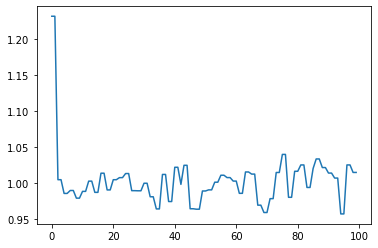

In [167]:
plt.plot(coherent_secondOrder);

In [163]:
a = annihilation_LO

C:\Users\ashuk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


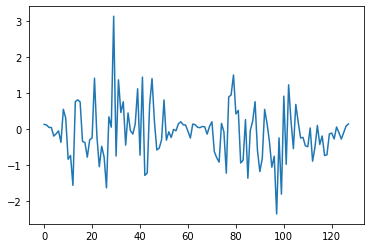

In [156]:
plt.plot(a[0]);

In [188]:
np.sum(annihilation_LO[0]*creation_LO[0])/128

(4.230099362167158+0j)

In [20]:
N = annihilation_LO*creation_LO

In [21]:
N = N.mean(axis=0)
# N = np.round_(N)

In [26]:
N = N.reshape(128,1)

In [27]:
N = np.round_(N)

In [34]:
N =N.astype(int)

<ipython-input-34-15b22893104c>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  N =N.astype(int)


In [40]:
hist_orig = np.histogram(N,  bins = np.arange(1,20))

In [ ]:
def displacement_operator(beta,annihilation,creation):
#     D = displace(hilbertsize, -beta)
#     return np.asarray(D)
     return np.exp(-beta*creation - np.conjugate(-beta)*annihilation)

In [13]:
D = np.asarray(D)

In [15]:
D.shape

(30, 30)

In [31]:
N_ket = histogram(annihilation_LO*creation_LO, np.arange(0,31))

<ipython-input-17-5174b2825a05>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  N = N.astype(int)


In [44]:
N_ket[0].reshape(1,30).shape

(1, 30)

In [79]:
def N_beta(beta, annihilation, creation, hilbertsize, bins):
#     D = displacement_operator(beta,annihilation, creation)
    D = displace(hilbertsize, -beta)
    N_ket = histogram(annihilation*creation, bins)[0].reshape(hilbertsize,1)
    rho_disp = D*(N_ket.reshape(hilbertsize,1))*N_ket.reshape(1,hilbertsize)*D.dag()
#     N = np.zeros_like(annihilation)
#     for i in range(len(annihilation[0])):
#         for j in range(len(annihilation[1])):
#             N[i][j] = D*annihilation[i][j]*creation[i][j]*np.conjugate(D)
#     N = D*annihilation*creation*np.conjugate(D)
    return (np.diagonal(rho_disp))

In [80]:
def histogram(N, bins):
    N = N.mean(axis=0)
    N = np.round_(N)
    N = N.astype(int)
    hist = np.histogram(N, bins = bins)
    return hist[0]/np.sum(hist[0]), np.sum(hist[0])

In [81]:
def create_data(beta, annihilation, creation, bins):
    N = N_beta(beta, annihilation, creation)
    hist = histogram(N, bins)
    return hist

In [87]:
np.sum(histogram(annihilation_LO*creation_LO, np.arange(0,31))[0])

<ipython-input-85-bed626ae9f11>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  N = N.astype(int)


1.0

In [88]:
hist  = N_beta(10, annihilation_LO, creation_LO, 30,np.arange(0,31))

<ipython-input-85-bed626ae9f11>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  N = N.astype(int)


In [89]:
hist

array([1.95549145e-04+0.j, 6.68175002e-04+0.j, 1.61687929e-06+0.j,
       1.05392011e-03+0.j, 2.88891448e-03+0.j, 7.10210061e-04+0.j,
       1.42324173e-03+0.j, 8.47294596e-03+0.j, 1.11212611e-02+0.j,
       9.09124034e-03+0.j, 5.76426432e-04+0.j, 1.76987467e-03+0.j,
       1.81674874e-02+0.j, 1.12771793e-02+0.j, 8.68893248e-03+0.j,
       1.55190441e-02+0.j, 7.51516672e-03+0.j, 4.36280957e-03+0.j,
       4.71822090e-03+0.j, 1.69416887e-03+0.j, 9.47418286e-04+0.j,
       8.20528992e-04+0.j, 2.07421495e-04+0.j, 1.41498001e-04+0.j,
       1.00187879e-04+0.j, 1.80036473e-05+0.j, 1.86346515e-05+0.j,
       9.15337783e-06+0.j, 9.80390146e-08+0.j, 3.28765893e-06+0.j])

In [82]:
hist = []
betas = np.linspace(0.5,2.5,10)
for i in betas:
    data = N_beta(i, annihilation_LO, creation_LO, 50, np.arange(0,51))
    hist.append(data)

<ipython-input-80-bed626ae9f11>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  N = N.astype(int)


In [83]:
hist = np.asarray(hist)

In [84]:
hist[3].sum()

(0.5004882812500001+0j)

In [85]:
def construct_R(hilbert_size, betas, ops=None):
    """
    Calculates the set of operators R in a displace and measure method.

    Parameters
    ----------
    hilbert_size (int):
        The hilbert space size
    beta: list_like
        A list of the displacements that were applied to the state before
        measurement.

    op: list of :class:`qutip.Qobj`
        Measurement operators such as photon occupation |n><n| that should
        be used to construct the R operator for various displacements.
        default: |n><n| constructed using `qutip.fock_dm(hilbert_size, n)`
                 for all n.

    Returns
    -------
    R (list of `qutip.Qobj`) : 
        The list of iterative operators applied for state reconstruction.
    """
    if ops == None:
        ops = []
        for n in range(hilbert_size):
            ops.append(fock_dm(hilbert_size, n))

    R_ops = []

    for beta in betas:
        D = displace(hilbert_size, -beta)
        displaced_operators = []
        
        for operator in ops:
            displaced_D = D.dag()*operator*D
            displaced_operators.append(displaced_D)
        R_ops.append(displaced_operators)

    return R_ops

In [86]:
hilbert_size = 50

In [91]:
# alpha_range = 2
# alphas = np.array([alpha_range, -alpha_range - 1j*alpha_range,
#                    -alpha_range + 1j*alpha_range])

# psi = sum([coherent(hilbert_size, a) for a in alphas])
# psi = psi.unit()
# rho = psi*psi.dag()
rho = coherent_dm(50,2)

In [92]:
r_ops = construct_R(hilbert_size, betas)
# data = [expect(r_ops[i], rho) for i in range(len(betas))]
data = hist


max_iter = 200

rho_reconstructed = qeye(hilbert_size)/hilbert_size # initial dm
rho_t = []
rho_t.append(rho_reconstructed)

fidelities = [fidelity(rho_reconstructed, rho)]

for iterations in range(max_iter):
    R = 0*qeye(hilbert_size)

    for i in range(len(betas)):
        # for all the n photons 
        for n in range(hilbert_size):
            r = r_ops[i][n]
            R += (data[i][n]/(expect(r, rho_reconstructed) + 1e-20))*r

    rho_reconstructed = R*rho_reconstructed*R

    # Trace renorm
    rho_reconstructed = rho_reconstructed/rho_reconstructed.tr()
    rho_t.append(rho_reconstructed)

    # Compute fidelity
    f = fidelity(rho_reconstructed, rho)
    fidelities.append(f)

    print(r"Iteration {}; Fidelity: {}".format(iterations, f))
#     clear_output(wait=True)

Iteration 0; Fidelity: 0.6514806376897717
Iteration 1; Fidelity: 0.4549923221830458
Iteration 2; Fidelity: 0.6391001251297713
Iteration 3; Fidelity: 0.5239716853770865
Iteration 4; Fidelity: 0.6269506620133586
Iteration 5; Fidelity: 0.5480611258038539
Iteration 6; Fidelity: 0.6186786481794959
Iteration 7; Fidelity: 0.5599587430207231
Iteration 8; Fidelity: 0.613140436972301
Iteration 9; Fidelity: 0.5669766645451136
Iteration 10; Fidelity: 0.6092995445877669
Iteration 11; Fidelity: 0.5715869890610761
Iteration 12; Fidelity: 0.6065306096741003
Iteration 13; Fidelity: 0.5748406386514616
Iteration 14; Fidelity: 0.6044669359699265
Iteration 15; Fidelity: 0.577258518238396
Iteration 16; Fidelity: 0.6028849108998975
Iteration 17; Fidelity: 0.5791265884481559
Iteration 18; Fidelity: 0.6016423801641834
Iteration 19; Fidelity: 0.5806137625131602
Iteration 20; Fidelity: 0.6006456354717962
Iteration 21; Fidelity: 0.5818259680830772
Iteration 22; Fidelity: 0.5998311849370236
Iteration 23; Fidelity:

In [93]:
rho_reconstructed

Quantum object: dims = [[50], [50]], shape = (50, 50), type = oper, isherm = True
Qobj data =
[[ 3.13045488e-05 -3.89853432e-05 -1.74114189e-05 ...  2.04419759e-08
   1.09103638e-08  1.58376251e-08]
 [-3.89853432e-05  1.34291268e-04 -4.03291254e-05 ...  5.25694391e-08
   2.69298038e-08  4.55810392e-08]
 [-1.74114189e-05 -4.03291254e-05  1.34191215e-04 ... -6.75495785e-07
  -3.63343657e-07 -5.11338773e-07]
 ...
 [ 2.04419759e-08  5.25694391e-08 -6.75495785e-07 ...  9.30734455e-09
   5.01084222e-09  7.06576923e-09]
 [ 1.09103638e-08  2.69298038e-08 -3.63343657e-07 ...  5.01084222e-09
   2.69781780e-09  3.80354048e-09]
 [ 1.58376251e-08  4.55810392e-08 -5.11338773e-07 ...  7.06576923e-09
   3.80354048e-09  5.36654397e-09]]

In [94]:
rho

Quantum object: dims = [[50], [50]], shape = (50, 50), type = oper, isherm = True
Qobj data =
[[0.01831564 0.03663128 0.05180445 ... 0.         0.         0.        ]
 [0.03663128 0.07326256 0.1036089  ... 0.         0.         0.        ]
 [0.05180445 0.1036089  0.14652511 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

In [190]:
hist

array([[  0, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [63]:
np.mean(annihilation_LO[100]*creation_LO[100])

(7.362750842324784+0j)

In [168]:
N = annihilation_LO*creation_LO

In [169]:
N

array([[ 8.7061    +0.j,  7.37425628+0.j, 14.25742623+0.j, ...,
         7.91522012+0.j,  9.81608422+0.j,  6.409     +0.j],
       [ 8.5306    +0.j,  7.06395998+0.j,  7.17186115+0.j, ...,
        13.21877133+0.j, 16.64488747+0.j, 11.962     +0.j],
       [ 9.8696    +0.j,  6.02387394+0.j, 11.36845641+0.j, ...,
         4.72848316+0.j,  7.89431619+0.j,  5.8105    +0.j],
       ...,
       [ 7.537     +0.j, 19.42499326+0.j,  7.70669626+0.j, ...,
        11.15207478+0.j,  7.54285549+0.j,  5.1098    +0.j],
       [ 5.1301    +0.j,  5.49414958+0.j, 15.80004562+0.j, ...,
         4.86905043+0.j,  8.30161543+0.j,  6.2365    +0.j],
       [ 9.8596    +0.j, 11.06593785+0.j,  8.03370539+0.j, ...,
        11.94332776+0.j,  9.19421721+0.j,  8.8281    +0.j]])

In [80]:
N = annihilation_LO*creation_LO
# N = np.round_(N)
# N = N.astype(int)
N = np.mean(N, axis=1)
hist = np.histogram(N, bins = np.arange(0,21))
# hist = np.unique(N, return_counts=True)

In [81]:
hist

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  2, 94,  4,  0,  0,  0,  0,  0,  0,
         0,  0,  0], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

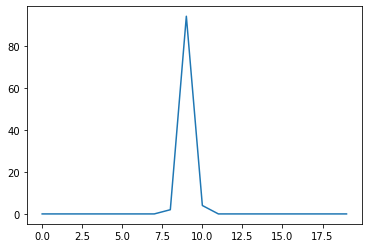

In [82]:
plt.plot(hist[0])

ValueError: x and y must be the same size

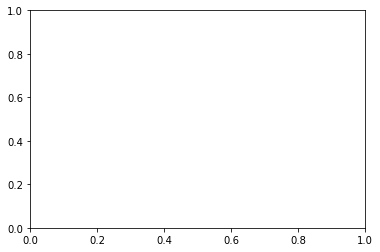

In [171]:
plt.scatter(np.arange(0,20),(hist[0]/np.sum(hist[0])),color='orange')
plt.scatter(np.arange(0,20),ns_, color='blue')

In [92]:
coefficients = (hist[0]/np.sum(hist[0]))

In [197]:
n = np.asarray(ns)+np.asarray(ns_)

In [25]:
alpha = 2
expect_n = alpha**2

In [55]:
import math
ns_ = []
for k in range(20):
    factorial = math.factorial(k)
#     print(factorial)
    ns_.append(((np.exp(-expect_n/2))*((alpha)**k)/(np.sqrt(factorial)))**2)

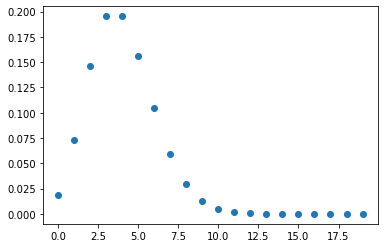

In [157]:
plt.scatter(np.arange(0,20),ns)

In [60]:
(annihilation_LO*creation_LO)

array([[ 2.1608    +0.j,  8.3562603 +0.j,  1.91086731+0.j, ...,
         1.95812264+0.j,  1.41361213+0.j,  3.7636    +0.j],
       [ 3.8818    +0.j, 17.86365743+0.j,  3.77149867+0.j, ...,
         2.02881486+0.j,  7.28027477+0.j,  1.8356    +0.j],
       [ 3.2416    +0.j,  1.2271937 +0.j, 15.12719151+0.j, ...,
         2.89764708+0.j,  1.81369193+0.j,  4.589     +0.j],
       ...,
       [11.6114    +0.j,  1.77986212+0.j,  5.15165568+0.j, ...,
         2.88902671+0.j,  3.62081901+0.j,  2.116     +0.j],
       [ 1.97      +0.j,  3.65453605+0.j,  6.4502859 +0.j, ...,
         3.11788843+0.j,  5.09276074+0.j,  5.5954    +0.j],
       [14.005     +0.j, 12.77337679+0.j,  6.93546708+0.j, ...,
         2.41505418+0.j, 11.6273145 +0.j,  2.7898    +0.j]])

In [96]:
coefficients = (hist[0]/np.sum(hist[0]))

In [97]:
coefficients

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.94, 0.04,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [105]:
psi = 0
for idx,coef in enumerate((coefficients)):
    psi+=coef*coherent(20,np.sqrt(idx))

In [108]:
psi

Quantum object: dims = [[20], [1]], shape = (20, 1), type = ket
Qobj data =
[[0.01107829]
 [0.03321575]
 [0.07043334]
 [0.12196742]
 [0.18294315]
 [0.24547615]
 [0.30073672]
 [0.34116764]
 [0.36209351]
 [0.36240754]
 [0.3441101 ]
 [0.31174072]
 [0.27005973]
 [0.22568952]
 [0.17990138]
 [0.14233821]
 [0.10187038]
 [0.08333568]
 [0.04391211]
 [0.05444542]]

In [109]:
coherent(20,3)

Quantum object: dims = [[20], [1]], shape = (20, 1), type = ket
Qobj data =
[[0.011109  ]
 [0.03332699]
 [0.07069722]
 [0.12245118]
 [0.18367675]
 [0.24642831]
 [0.30181146]
 [0.34222334]
 [0.36297816]
 [0.36299226]
 [0.34432416]
 [0.31156056]
 [0.26955432]
 [0.22489021]
 [0.17901283]
 [0.14127186]
 [0.10103263]
 [0.0822669 ]
 [0.04343396]
 [0.05344559]]

In [110]:
fidelity(psi*psi.dag(),coherent_dm(20,3))

0.9991863296416819

In [301]:
N = annihilation_squeezed*creation_squeezed
N = np.round_(N)
N = N.astype(int)
hist = np.histogram(N, bins = np.arange(0,21))
# hist = np.unique(N, return_counts=True)

<ipython-input-301-7a23d8a94a31>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  N = N.astype(int)


In [298]:
expect_n = 9
ns_ = []
for k in range(20):
    factorial = math.factorial(k)
#     print(factorial)
    ns_.append(((np.exp(-expect_n/2))*((alpha)**k)/(np.sqrt(factorial)))**2)

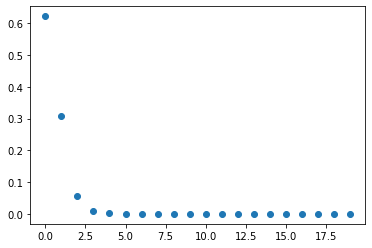

In [302]:
plt.scatter(np.arange(0,20), hist[0]/np.sum(hist[0]));
# plt.scatter(np.arange(0,20), ns_);

In [93]:
coefficients = hist[0]/np.sum(hist[0])

In [303]:
psi = 0
for idx,coef in enumerate(np.sqrt(coefficients)):
    psi+=coef*coherent(20,idx)

In [306]:
fidelity(psi*psi.dag(), coherent_dm(20,3))

0.4702114405373791

In [296]:
np.sqrt(ns_)

array([0.011109  , 0.03332699, 0.07069722, 0.12245118, 0.18367677,
       0.24642824, 0.30181173, 0.34222233, 0.3629816 , 0.3629816 ,
       0.34435458, 0.31148044, 0.26974997, 0.22444554, 0.17995678,
       0.13939392, 0.10454544, 0.07606798, 0.05378819, 0.03701957])

In [96]:
coherent(20,3)

Quantum object: dims = [[20], [1]], shape = (20, 1), type = ket
Qobj data =
[[0.011109  ]
 [0.03332699]
 [0.07069722]
 [0.12245118]
 [0.18367675]
 [0.24642831]
 [0.30181146]
 [0.34222334]
 [0.36297816]
 [0.36299226]
 [0.34432416]
 [0.31156056]
 [0.26955432]
 [0.22489021]
 [0.17901283]
 [0.14127186]
 [0.10103263]
 [0.0822669 ]
 [0.04343396]
 [0.05344559]]

In [97]:
fidelity(psi*psi.dag(), coherent_dm(20,3))

0.9951207485490057

In [198]:
N = annihilation_fock*creation_fock

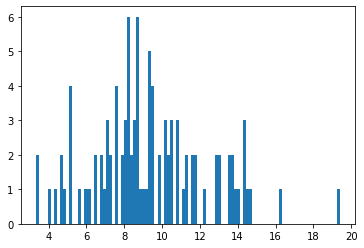

In [286]:
plt.hist(N[:,0], bins = 100);

In [315]:
N = annihilation_fock*creation_fock
# N = np.mean(N, axis=1)
# N = np.round_(N)
# N = N.astype(int)
hist = np.histogram(N, bins = np.arange(0,51))
# hist = np.unique(N, return_counts=True)

In [316]:
hist

(array([6181, 3248, 1709,  817,  421,  213,  110,   57,   30,    9,    3,
           0,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]))

In [279]:
psi = 0
for idx,coef in enumerate(np.sqrt(coefficients)):
    psi+=coef*basis(50,idx)

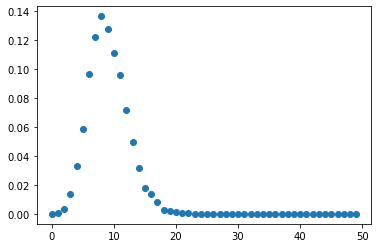

In [280]:
plt.scatter(np.arange(0,50), hist[0]/np.sum(hist[0]));

C:\Users\ashuk\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


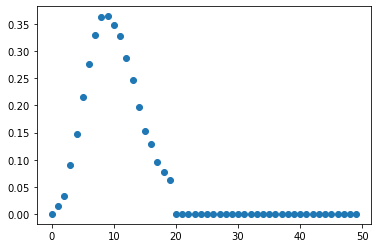

In [291]:
plt.scatter(np.arange(0,50),np.asarray(psi))

In [166]:
squeezed_vacuum = psi*psi.dag()

In [167]:
squeezed_vacuum

Quantum object: dims = [[50], [50]], shape = (50, 50), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00023478 0.00050718 ... 0.         0.         0.        ]
 [0.         0.00050718 0.00109563 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

In [122]:
vac = basis(20,0)
s = squeeze(20, 0.804)
sq = s*vac

In [123]:
sq*sq.dag()

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[ 7.45713215e-01  0.00000000e+00 -3.51321992e-01  0.00000000e+00
   2.02712686e-01  0.00000000e+00 -1.23304769e-01  0.00000000e+00
   7.67884696e-02  0.00000000e+00 -4.87593989e-02  0.00000000e+00
   3.04532928e-02  0.00000000e+00 -2.10817188e-02  0.00000000e+00
   1.05921448e-02  0.00000000e+00 -1.19746015e-02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.51321992e-01  0.00000000e+00  1.65515562e-01  0.00000000e+00
  -9.55024307e-02  0.00000000e+00  5.80916042e-02  0.00000000e+00
  -3.61767467e-02  0.00000000e+00  2.29716315e-02  0.00000000e+00
  -1.43472199e-02  0.00000000e+00  9.93206408e

In [124]:
fidelity(sq*sq.dag(),squeezed_vacuum)

0.00027778082378183136

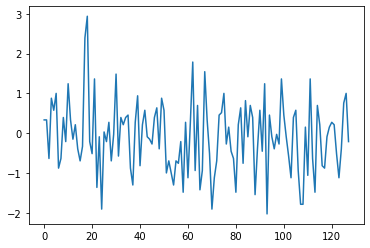

In [241]:
plt.plot(annihilation_fock[0].real);

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [64]:
def pdf1__(x,var_real,var_imag):
    wave_func = np.exp(-x**2/(4*var_real))/(2*np.pi*var_real)**(1/4)
    return wave_func*np.conjugate(wave_func)

In [65]:
def pdf2__(x,var_real,var_imag):
    wave_func = np.exp(-x**2/(4*var_imag))/(2*np.pi*var_imag)**(1/4)
    return wave_func*np.conjugate(wave_func)

In [225]:
mean_real = np.zeros(128)
mean_imag = np.zeros(128)
n = 1
var_real = np.ones(128)*((2*n +1)/4)
var_imag = np.ones(128)*((2*n + 1)/4)

In [226]:
annihilation = []
# Es_imag = []
# distributions1 = []
# distributions2 = []
for nums in range(100):
    E_r = []
    E_i = []
    for i in range(len(mean_real)):
        x1 = np.linspace(mean_real[i]-(var_real[i])*4,mean_real[i]+(var_real[i])*4,100)
        x2 = np.linspace(mean_imag[i]-(var_imag[i])*4,mean_imag[i]+(var_imag[i])*4,100)
        distribution1 = []
        distribution2 = []
        for j in range(len(x1)):
            distribution1.append(pdf1__(x1[j],var_real[i],var_imag[i]))
        for a1 in range(len(x2)):
            distribution2.append(pdf2__(x2[a1],var_real[i],var_imag[i]))
#         distributions1.append(distribution1)
#         distributions2.append(distribution2)
#         distribution1 = distribution1/np.max(distribution1)
#         distribution2 = distribution2/np.max(distribution2)
        random_number1 = random.choices(x1, distribution1)
        random_number2 = random.choices(x2,distribution2)
        E_r.append(random_number1[0] + 1j*random_number2[0])
#         E_i.append(random_number2[0])
    annihilation.append(E_r)
#     Es_imag.append(E_i)
        
        

In [227]:
annihilation_fock = np.asarray(annihilation)
creation_fock = np.conjugate(annihilation_fock)

In [136]:
N = np.asarray(annihilation_fock*creation_fock)

In [127]:
# N = np.mean(N, axis=1)

In [141]:
hist = np.histogram(N, bins = np.arange(0,31))

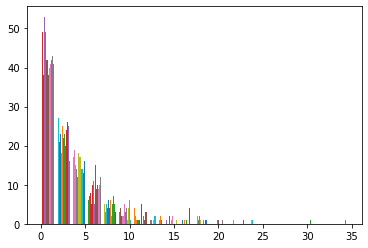

In [134]:
plt.hist(N, bins=20);

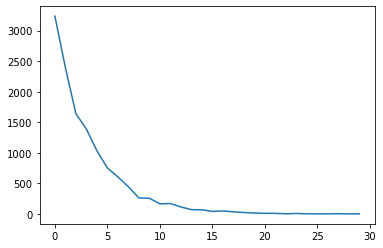

In [142]:
plt.plot(hist[0])

In [143]:
coefficents = hist[0]/np.sum(hist[0])

In [140]:
coefficents

array([0.25360502, 0.18761755, 0.12852665, 0.10877743, 0.08103448,
       0.05893417, 0.04749216, 0.03487461, 0.02053292, 0.0200627 ,
       0.01293103, 0.01332288, 0.00893417, 0.00548589, 0.00532915,
       0.00321317, 0.00376176, 0.00266458, 0.00180251, 0.00109718])

In [124]:
coefficents

array([0.  , 0.  , 0.03, 0.86, 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [313]:
alphas = np.linspace(0,100j,100)
# psi = 0
for i in alphas:
    psi+=np.exp(-0.5*i**2)*coherent(5,i)
    

<ipython-input-313-b8202fb60459>:4: RuntimeWarning: overflow encountered in exp
  psi+=np.exp(-0.5*i**2)*coherent(5,i)


In [111]:
N = (annihilation_fock*creation_fock).flatten()

In [71]:
from qutip import*

In [385]:
creation_fock = creation_fock.flatten()
annihilation_fock = annihilation_fock.flatten()

In [145]:
psi = 0
# coefficients = hist[0]/np.sum(hist[0])
for idx, coef in enumerate(coefficents):
    psi+=coef*coherent(30,np.sqrt(idx))

In [146]:
psi

Quantum object: dims = [[30], [1]], shape = (30, 1), type = ket
Qobj data =
[[0.45755794]
 [0.26554879]
 [0.26631531]
 [0.24046108]
 [0.20726101]
 [0.17486003]
 [0.14588797]
 [0.12087825]
 [0.09968318]
 [0.08194097]
 [0.06722022]
 [0.05508242]
 [0.04510852]
 [0.03693323]
 [0.03022336]
 [0.02473485]
 [0.02020506]
 [0.01652609]
 [0.01343648]
 [0.01100112]
 [0.0088465 ]
 [0.00730545]
 [0.00572153]
 [0.0048758 ]
 [0.00357385]
 [0.00333702]
 [0.00205979]
 [0.00244002]
 [0.0009302 ]
 [0.00202391]]

In [147]:
alphas = np.linspace(0,10,10000)
psi = []
for i in alphas:
    psi.append(np.exp(-0.5*i**2)*(i**(3))/6)

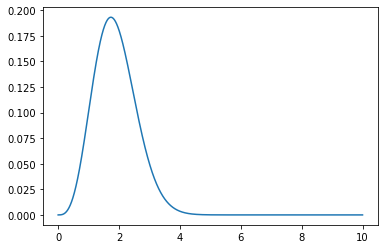

In [149]:
plt.plot(alphas,psi)

In [17]:
alpha

array([7.88144909+2.86657883j])

In [32]:
alphas = []
for iter in range(100000):
    alpha_real = np.random.rand(1)*10
    alpha_imag = np.random.rand(1)*10j
    alpha = alpha_real + alpha_imag
    if(np.absolute(alpha) < 7.5):
        alphas.append(alpha)
    if(len(alphas)==10000):
        break

In [30]:
alphas = np.asarray(alphas)

In [33]:
len(alphas)

10000

C:\Users\ashuk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


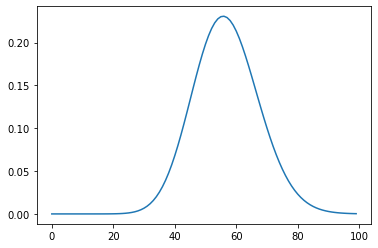

In [12]:
plt.plot(np.asarray(coherent(100,7.5, method='analytic')))

In [3]:
import math

In [36]:
w = 10**2
times = np.linspace(0,2*np.pi/w,128)

In [34]:
# alphas = np.linspace(0,3,100)
def func(alphas,times,num_trajectories=100):
    input = []
    output = []
    for alpha in alphas:
        w = 10**2
#         times = np.linspace(0,2*np.pi/w,128)
        beta = alpha*np.exp(-1j*w*times)
        beta_1 = beta.real
        beta_2 = beta.imag
        annihilation = []
        # Es_real = []
        # Es_imag = []
        # # distributions1 = []
        # distributions2 = []
#         num_trajectories = 100
    # Es_real = []
    # Es_imag = []
    # # distributions1 = []
        annihilation = np.zeros((num_trajectories, len(times)),dtype = complex)
    # annihilation.astype(np.complex128)
        for i in range(len(beta_1)):
            x1 = np.arange(beta_1[i]-(0.5)*4,beta_1[i]+(0.5)*4,0.01)
            x2 = np.arange(beta_2[i]-(0.5)*4,beta_2[i]+(0.5)*4,0.01)
    #         x1_complex = np.arange(np.absolute(beta_1[i].imag)-(0.5)*4,np.absolute(beta_1[i].imag)+(0.5)*4,0.01)
    #         x2_complex = np.arange(np.absolute(beta_2[i].imag)-(0.5)*4,np.absolute(beta_2[i].imag)+(0.5)*4,0.01)
    #         x1 = x1_real + 1j*x1_complex
    #         x2 = x2_real + 1j*x2_complex
    #         distribution1 = []
    #         distribution2 = []
    #         for j in range(len(x1)):
            distribution1 = pdf1(x1,beta_1[i],beta_2[i])
            distribution2 = pdf2(x2,beta_1[i],beta_2[i])
    #         distributions1.append(distribution1)
    #         distributions2.append(distribution2)
    #         distribution1 = distribution1/np.max(distribution1)
    #         distribution2 = distribution2/np.max(distribution2)
#             for k in range(num_trajectories):
            random_number1 = random.choices(x1, distribution1, k =num_trajectories)
            random_number2 = random.choices(x2,distribution2,  k =num_trajectories)
            annihilation[:,i] = random_number1 + 1j*np.asarray(random_number2)
    #          E_i.append(random_number2[0])
        input.append(annihilation)
    #     expect_n = alpha*np.conjugate(alpha)
    #     ns_ = []
    #     for k in range(101):
    #         if(k>21):
    #             factorial_ = np.sqrt(2*pi*k)*((k/e)**k)
    #         else:
    #             factorial_ = math.factorial(k)
    # #     print(factorial)
    #         ns_.append(((np.exp(-expect_n/2))*((alpha)**k)/(np.sqrt(factorial_))))
    #     output.append(ns_)
        output.append(np.asarray(coherent(100,alpha, method='analytic')))
#         if(len(output)%100 == 0):
#             print(len(output))
            
    return np.asarray(input),np.asarray(output)



In [58]:
%timeit func(np.arange(10),times,num_trajectories=100)

375 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
input, output = func(alphas,times,num_trajectories=100)

C:\Users\ashuk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


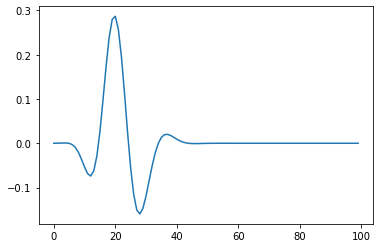

In [135]:
plt.plot(output[0])

In [133]:
right = 0
tol = 0.01
for i in range(len(output)):
    if((np.sum(output[i]*np.conjugate(output[i])) > 1-tol) & (np.sum(output[i]*np.conjugate(output[i])) <= 1)):
        right+=1
#         print(np.sum(output[i]*np.conjugate(output[i])))

In [134]:
right

4682

In [41]:
input = np.asarray(input)
output = np.asarray(output)

In [42]:
input.shape

(10000, 100, 128)

In [43]:
np.save("input.npy", input)
np.save("output.npy", output)

In [6]:
import math

In [18]:
expect_n = 9
alpha = 3
ns_ = []
for k in range(21):
    factorial = math.factorial(k)
#     print(factorial)
    ns_.append(((np.exp(-expect_n/2))*((alpha)**k)/(np.sqrt(factorial)))**2)

In [19]:
ns_

[0.00012340980408667953,
 0.0011106882367801158,
 0.00499809706551052,
 0.014994291196531567,
 0.03373715519219603,
 0.06072687934595284,
 0.09109031901892924,
 0.117116124452909,
 0.1317556400095227,
 0.1317556400095227,
 0.11858007600857037,
 0.09702006218883033,
 0.07276504664162277,
 0.05037580152112342,
 0.03238444383500793,
 0.01943066630100476,
 0.010929749794315172,
 0.005786338126402152,
 0.0028931690632010756,
 0.0013704485036215624,
 0.0006167018266297032]

In [9]:
annihilations

NameError: name 'annihilations' is not defined

In [9]:
annihilation_LO = np.asarray(annihilation)

In [10]:
creation_LO = np.conjugate(annihilation)

## WIGNER REPRESENTATION

In [11]:
def wigner(x, y ,Xo,Yo, sigma_x, sigma_y):
    return (1/(2*np.pi*sigma_x*sigma_y))*(np.exp(-0.5*(((x-Xo)**2)/(sigma_x**2)) - 0.5*(((y-Yo)**2)/(sigma_y**2))))

In [148]:
X1 = annihilation_LO[:,0].real
X2 = annihilation_LO[:,0].imag

In [150]:
Xo = np.mean(X1)
Yo = np.mean(X2)

In [151]:
wigner_ = []
for x,y in zip(X1,X2):
    wigner_.append(wigner(x,y,Xo,Yo,1/4,1/4))

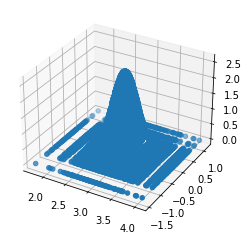

In [152]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# X1, X2 = np.meshgrid(X1, X2)
# Data for a three-dimensional line
zline = wigner_
xline = X1
yline = X2
ax.scatter(xline, yline, zline, 'gray')

In [153]:
def wigner_fock(x,y,n):
    return (2/np.pi)*((-1)**n)*np.exp(-2*(x**2 + y**2))*scipy.special.eval_laguerre(n, 4*(x**2+y**2))

In [228]:
X1 = annihilation_fock[:,0].real
X2 = annihilation_fock[:,0].imag

In [229]:
X1, X2 = np.meshgrid(X1,X2)

In [156]:
import scipy

In [230]:
# wigner_ = []
# for x,y in zip(X1,X2):
#     wigner_.append(wigner_fock(x,y,3))
# 
wigner_ = wigner_fock(X1,X2,n)

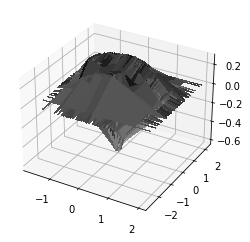

In [232]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# X1, X2 = np.meshgrid(X1, X2)
# Data for a three-dimensional line
zline = wigner_
xline = X1
yline = X2
ax.plot_surface(xline, yline, zline,cmap='binary', linewidth=0, antialiased=False)

In [80]:
scipy.special.genlaguerre(3, 1**2+1**2)

poly1d([ -0.16666667,   2.5       , -10.        ,  10.        ])

In [165]:
wigners = []
# output = []

In [166]:
ns = np.arange(0,20)
for n in ns:
    mean_real = np.zeros(128)
    mean_imag = np.zeros(128)
    var_real = np.ones(128)*((2*n +1)/4)
    var_imag = np.ones(128)*((2*n + 1)/4)
    annihilation = []
    # Es_imag = []
    # distributions1 = []
    # distributions2 = []
    for nums in range(100):
        E_r = []
        E_i = []
        for i in range(len(mean_real)):
            x1 = np.linspace(mean_real[i]-(var_real[i])*4,mean_real[i]+(var_real[i])*4,100)
            x2 = np.linspace(mean_imag[i]-(var_imag[i])*4,mean_imag[i]+(var_imag[i])*4,100)
            distribution1 = []
            distribution2 = []
            for j in range(len(x1)):
                distribution1.append(pdf1__(x1[j],var_real[i],var_imag[i]))
            for a1 in range(len(x2)):
                distribution2.append(pdf2__(x2[a1],var_real[i],var_imag[i]))
#         distributions1.append(distribution1)
#         distributions2.append(distribution2)
#         distribution1 = distribution1/np.max(distribution1)
#         distribution2 = distribution2/np.max(distribution2)
            random_number1 = random.choices(x1, distribution1)
            random_number2 = random.choices(x2,distribution2)
            E_r.append(random_number1[0] + 1j*random_number2[0])
#         E_i.append(random_number2[0])
        annihilation.append(E_r)
    annihilation_fock = np.asarray(annihilation)
    creation_fock = np.conjugate(annihilation_fock)
    X1 = annihilation_fock[:,0].real
    X2 = annihilation_fock[:,0].imag
    wigner_ = []
    for x,y in zip(X1,X2):
        wigner_.append(wigner_fock(x,y,3))
    wigners.append(wigner_)
    
    
        
        

In [167]:
np.save("wigners_20",wigner)

In [170]:
wigners = np.asarray(wigners)

In [11]:
def wigner(x, y ,Xo,Yo, sigma_x, sigma_y):
    return (1/(2*np.pi*sigma_x*sigma_y))*(np.exp(-0.5*(((x-Xo)**2)/(sigma_x**2)) - 0.5*(((y-Yo)**2)/(sigma_y**2))))

In [201]:
wigners = []
for i in range(100):
    for j in range(128):
        X1 = annihilation_LO[i][:,j].real
        X2 = annihilation_LO[i][:,j].imag
        Xo = np.mean(X1)
        Yo = np.mean(X2)
        wigner_ = []
        for x,y in zip(X1,X2):
            wigner_.append(wigner(x,y,Xo,Yo,1/4,1/4))
        wigners.append(wigner_)

In [173]:
annihilation_LO = np.load('input.npy')

In [202]:
wigners = np.asarray(wigners)

In [182]:
# wigners = wigners.reshape(10,128)

In [236]:
wigners = wigners.reshape(100,128,10)

In [200]:
annihilation_LO.shape

(100, 10, 128)

In [237]:
np.save('wigners_coherent.npy', wigners)

In [9]:
import matplotlib.pyplot as plt

In [1]:
import math


In [41]:
E = 20
Ns = [ 10, 100, 1000]

In [42]:
answer = []
for N in Ns:
    answer.append(math.factorial(E+N-1)/(math.factorial(E)*math.factorial(N-1)))

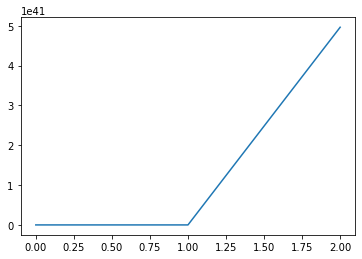

In [43]:
plt.plot(answer)

In [44]:
answer

[10015005.0, 2.455185607598053e+22, 4.964324324894504e+41]